# STAT 301 - Case-Study Project Final Report


# Project Title - **Factors Associated with Airbnb Prices in Budapest**
##### Group Number: 10
##### Group Members: Winnie Chen, Yifan Hao, Roxanna Ng, Jennifer Tjen
##### Course: STAT 301
##### Date: 2025.12.6

# Section 2: Introduction 

**Background**

Airbnb provides travelers with alternative accommodation options and homeowners with income opportunities, introducing competition into the short-term rental market. Understanding the factors that influence Airbnb accomodation pricing is important for hosts seeking to optimize their revenue and travelers looking for both quality and good value. Previous research has shown that location, room characteristics, and host reputation are highly associated with rental prices across various markets (Wang & Nicolau (2017)).

**Research Question**

Which room characteristics and location features are most strongly associated with Airbnb listing prices in Budapest, and how well can we model these relationships to understand pricing patterns?

**Primary Goal**

Our primary goal is *inference* - understanding associations between listing features and pricing patterns (rather than causal effects or prediction) in order to draw meaningful conclusions about the factors correlated with pricing, and provide insights that can inform hosts, Airbnb employees, government officials, or researchers studying housing markets.

**Response Variable**

`realSum` (total Airbnb listing price)

**Explanatory Variables**

`room_type`, `person_capacity`, `guest_satisfaction_overall`, `bedrooms`,`cleanliness_rating`, `host_is_superhost`, `attr_index_norm`, `rest_index_norm`, `lat`, `lng`, `dist`, `Period`

# Section 3: Methods and Results

### 3.1.1 Variable and data set description

**Number of observations**: 
* budapest weekdays dataset: 2,074 observations
* budapest weekends dataset: 1,948 observations
* total: 4022 observations for budapest.
  
**Number of variables**: the dataset contains 20 variables.

**Data type coverage**: numeric, categorical, and boolean.

| Variable Name | Description | Type | Example Values |
|----------------|-------------|------|----------------|
| realSum | Total price of the Airbnb listing | Numeric | 120.0 |
| room_type | Type of room offered (entire, private, shared) | Categorical | "Entire home/apt" |
| room_shared | Whether the room is shared | Boolean | TRUE/FALSE |
| room_private | Whether the room is private | Boolean | TRUE/FALSE |
| person_capacity | Maximum number of guests allowed | Numeric | 2 |
| host_is_superhost | Indicates if host is a Superhost | Boolean | TRUE |
| multi | Listing for multiple rooms | Boolean | FALSE |
| biz | Business indicator | Boolean | FALSE |
| cleanliness_rating | Cleanliness rating (1–10) | Numeric | 9.2 |
| guest_satisfaction_overall | Overall guest satisfaction | Numeric | 8.8 |
| bedrooms | Number of bedrooms | Numeric | 1 |
| dist | Distance from city centre (km) | Numeric | 3.1 |
| metro_dist | Distance to nearest metro station (km) | Numeric | 0.5 |
| attr_index | Attraction index | Numeric | 43.84 |
| attr_index_norm | Normalized value of attraction index | Numeric | 11.65 |
| rest_index | Restaurant index | Numeric | 68.73 |
| rest_index_norm | Normalized value of restaurant index | Numeric | 5.21 |
| lng | Longitude | Numeric | 16.37 |
| lat | Latitude | Numeric | 48.21 |

#### Source and Information
**Source:** 

We accessed the data from Kaggle, from the project “Airbnb Prices in European Cities” by user thedevastator: 
[Kaggle Dataset - Airbnb Prices in European Cities](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities).

However, the original data source can be found here: 

Gyódi, K., & Nawaro, Ł. (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach (Supplementary Material) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4446043
  
**Data Collection method:** 
The creators of the dataset used an automated experiment based on web-scraping of public Airbnb listings, with the Selenium WebDriver framework. The data was combined with geographic and amenity indices that measure proximity to attractions, restaurants, and metro stations for major European cities. Hence, the data is observational. The dataset is allowed for use under the Creative Commons Attribution 4.0 International license.

### 3.1.2 Data Loading and Processing

In [1]:
# Load required libraries
library(tidyverse)
library(scales)
library(patchwork)
library(car)
library(broom)
library(knitr)

# Read data from open source
weekdays_url <- "https://raw.githubusercontent.com/yihan3949-sketch/stat-301-dataset/refs/heads/main/budapest_weekdays.csv"
weekends_url <- "https://raw.githubusercontent.com/yihan3949-sketch/stat-301-dataset/refs/heads/main/budapest_weekends.csv"

# Data preprocessing 
weekdays <- read_csv(weekdays_url, show_col_types = FALSE) %>%
  mutate(period = "Weekday")

weekends <- read_csv(weekends_url, show_col_types = FALSE) %>%
  mutate(period = "Weekend")

#Combine both datasets
budapest <- bind_rows(weekdays, weekends)

head(budapest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


New names:
• `` -> `...1`
New names:
• `` -> `...1`


...1 realSum  room_type       room_shared room_private person_capacity
1 0    238.9905 Entire home/apt FALSE       FALSE        6              
2 1    300.7943 Entire home/apt FALSE       FALSE        6              
3 2    162.3819 Entire home/apt FALSE       FALSE        4              
4 3    118.4377 Entire home/apt FALSE       FALSE        2              
5 4    134.4174 Entire home/apt FALSE       FALSE        4              
6 5    127.3676 Entire home/apt FALSE       FALSE        4              
  host_is_superhost multi biz cleanliness_rating ⋯ bedrooms dist     
1  TRUE             0     1   10                 ⋯ 1        0.3593550
2 FALSE             0     1    9                 ⋯ 2        0.9294272
3  TRUE             0     0   10                 ⋯ 1        2.4508403
4 FALSE             0     0    9                 ⋯ 1        1.5594494
5  TRUE             1     0   10                 ⋯ 2        1.1138030
6 FALSE             1     0    9                 ⋯ 2        0.2684703
  metro_dist attr_index attr_index_norm rest_index rest_index_norm lng     
1 0.3526430   404.4047   24.116552       893.4773  67.65685        19.05074
2 0.2002355  1676.8760  100.000000       452.5397  34.26770        19.04493
3 0.2794518   163.5885    9.755551       191.9923  14.53825        19.02170
4 0.4779711   191.7198   11.433155       326.2156  24.70205        19.06301
5 0.2701016   198.6035   11.843658       635.5159  48.12322        19.06900
6 0.1669317   635.6350   37.905903      1005.6535  76.15118        19.05480
  lat      period 
1 47.50076 Weekday
2 47.50405 Weekday
3 47.49882 Weekday
4 47.51126 Weekday
5 47.49900 Weekday
6 47.50094 Weekday

### 3.1.3 Pre-selection of Variables
**Variables to keep:** `realSum`, `room_type`, `person_capacity`, `guest_satisfaction_overall`, `bedrooms`, `dist`, `metro_dist`, `cleanliness_rating`, `host_is_superhost`, `attr_index_norm`, `rest_index_norm`

**Variables to discard:**  
  - `biz` – redundant and not directly related to pricing trends.  
  - `multi` – not relevant to single listing analysis.  
  - `room_shared` `room_private`- highly redundant boolean columns that duplicate `room_type`which we will keep.
  - `attr_index` `rest_index`- We have `attr_index_norm` and `rest_index_norm` to replace them since normalized versions provide a standardized scale.
  - `lat`, `lng` - encode arbitrary distance and do not give any meaningful insight into the question.
  - `...1` - an observation identifier, that is not useful or meaningful after datasets (weekday + weekend) are merged
- These variables will be removed to reduce multicollinearity and simplify analysis.

**Variables Added:**
  - `period` - one new variable created to indicate whether the listing is for a weekend or weekday, due to our combining of two different dataset files (budapest weekdays & budapest weekends).  

In [2]:
# wrangle budapest dataset into clean format, with above variables removed and filtering out outliers 
Q1 <- quantile(budapest$realSum, 0.25)
Q3 <- quantile(budapest$realSum, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

budapest_clean <- budapest %>%
  mutate(
    period = factor(period),
    room_type = factor(room_type),
    host_is_superhost = as.factor(host_is_superhost)
  ) %>%
  select(
    realSum, room_type, person_capacity, guest_satisfaction_overall,
    bedrooms, cleanliness_rating, host_is_superhost,
    dist, attr_index_norm, rest_index_norm, metro_dist, period
  ) %>%
  filter(realSum >= lower_bound & realSum <= upper_bound)

head(budapest_clean)

realSum  room_type       person_capacity guest_satisfaction_overall bedrooms
1 238.9905 Entire home/apt 6               99                         1       
2 300.7943 Entire home/apt 6               98                         2       
3 162.3819 Entire home/apt 4               98                         1       
4 118.4377 Entire home/apt 2               92                         1       
5 134.4174 Entire home/apt 4               99                         2       
6 127.3676 Entire home/apt 4               91                         2       
  cleanliness_rating host_is_superhost dist      attr_index_norm
1 10                 TRUE              0.3593550  24.116552     
2  9                 FALSE             0.9294272 100.000000     
3 10                 TRUE              2.4508403   9.755551     
4  9                 FALSE             1.5594494  11.433155     
5 10                 TRUE              1.1138030  11.843658     
6  9                 FALSE             0.2684703  37.905903     
  rest_index_norm metro_dist period 
1 67.65685        0.3526430  Weekday
2 34.26770        0.2002355  Weekday
3 14.53825        0.2794518  Weekday
4 24.70205        0.4779711  Weekday
5 48.12322        0.2701016  Weekday
6 76.15118        0.1669317  Weekday

### 3.1.4 Multicollinearity Diagnosis

We calculate the GVIF of variables to check for multicollinearity.
The variable `dist` has a GVIF > 5, so we remove it. After removing, all variables have GVIF < 5.

In [3]:
# fit model with all variables
model <- lm(realSum ~ ., data = budapest_clean)

# check VIF
vif(model)

# Drop highly correlated variable dist
model_no_dist <- lm(realSum ~ . - dist, data = budapest_clean)

# all variables under sqrt(5) GVIF
print('After dropping dist')
vif(model_no_dist)

# remove dist
budapest_clean <- budapest_clean %>% select(-dist)

GVIF     Df GVIF^(1/(2*Df))
room_type                  1.202795 2  1.047244       
person_capacity            1.487311 1  1.219554       
guest_satisfaction_overall 1.985268 1  1.408995       
bedrooms                   1.376821 1  1.173380       
cleanliness_rating         1.962145 1  1.400766       
host_is_superhost          1.132288 1  1.064090       
dist                       6.581959 1  2.565533       
attr_index_norm            2.146979 1  1.465257       
rest_index_norm            2.731514 1  1.652729       
metro_dist                 3.987934 1  1.996981       
period                     1.057650 1  1.028421

[1] "After dropping dist"


GVIF     Df GVIF^(1/(2*Df))
room_type                  1.189923 2  1.044431       
person_capacity            1.486302 1  1.219140       
guest_satisfaction_overall 1.984089 1  1.408577       
bedrooms                   1.374225 1  1.172274       
cleanliness_rating         1.961435 1  1.400513       
host_is_superhost          1.132282 1  1.064087       
attr_index_norm            1.996426 1  1.412949       
rest_index_norm            2.112899 1  1.453582       
metro_dist                 1.272689 1  1.128135       
period                     1.048359 1  1.023894

### 3.2.1 Exploratory Data Analysis and Plots

Below are tables that summarize the dataset, and the number of NA values (turns out there are none)!

In [4]:
# Calculate NA's
na_summary <- budapest_clean %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "na_count") %>%
  mutate(na_percentage = (na_count / nrow(budapest_clean)) * 100) %>%
  arrange(desc(na_count))

# print overall summary
summary(budapest_clean)
# print NA summary
print(na_summary)

    realSum                 room_type    person_capacity
 Min.   : 34.78   Entire home/apt:3372   Min.   :2.000  
 1st Qu.:123.14   Private room   : 413   1st Qu.:2.000  
 Median :150.63   Shared room    :  14   Median :4.000  
 Mean   :157.82                          Mean   :3.479  
 3rd Qu.:184.71                          3rd Qu.:4.000  
 Max.   :307.14                          Max.   :6.000  
 guest_satisfaction_overall    bedrooms     cleanliness_rating
 Min.   : 20.00             Min.   :0.000   Min.   : 2.000    
 1st Qu.: 93.00             1st Qu.:1.000   1st Qu.: 9.000    
 Median : 96.00             Median :1.000   Median :10.000    
 Mean   : 94.58             Mean   :1.066   Mean   : 9.474    
 3rd Qu.: 98.00             3rd Qu.:1.000   3rd Qu.:10.000    
 Max.   :100.00             Max.   :3.000   Max.   :10.000    
 host_is_superhost attr_index_norm    rest_index_norm     metro_dist      
 FALSE:2337        Min.   :  0.9263   Min.   :  1.895   Min.   : 0.01585  
 TRUE :146

# A tibble: 11 × 3
   variable                   na_count na_percentage
   <chr>                         <int>         <dbl>
 1 realSum                           0             0
 2 room_type                         0             0
 3 person_capacity                   0             0
 4 guest_satisfaction_overall        0             0
 5 bedrooms                          0             0
 6 cleanliness_rating                0             0
 7 host_is_superhost                 0             0
 8 attr_index_norm                   0             0
 9 rest_index_norm                   0             0
10 metro_dist                        0             0
11 period                            0             0


### 3.2.2 Data visualization
Next, we explore some plots

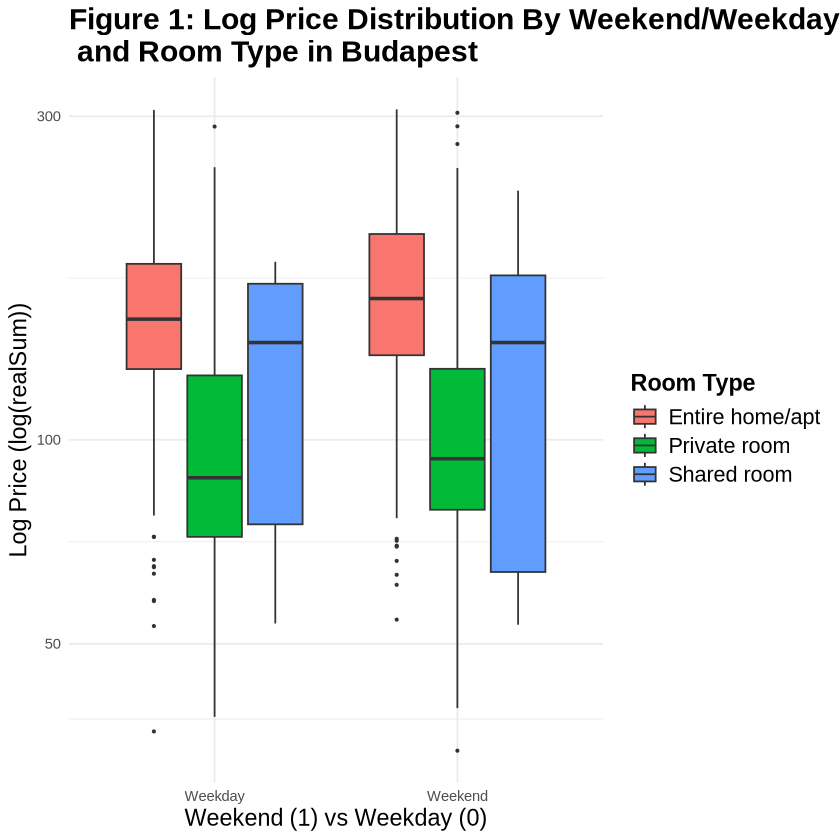

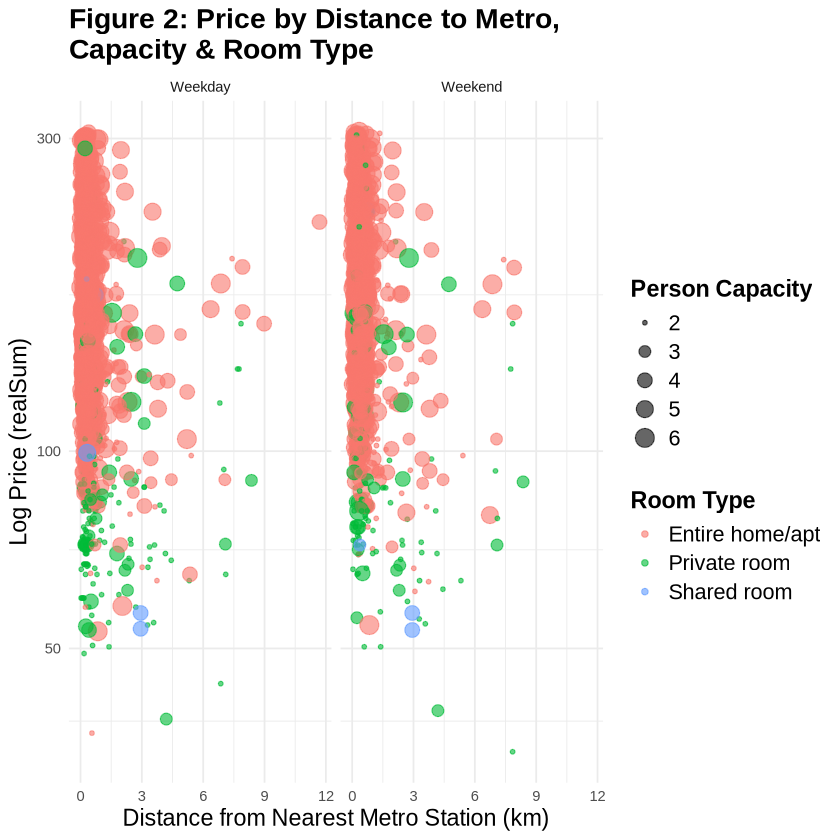

In [5]:
### Plot 1: Price distribution by room type and weekday/weekend
p_box <- ggplot(budapest_clean, aes(x = as.factor(period), y = realSum, fill = as.factor(room_type))) +
    geom_boxplot(outlier.size = 0.5) +
    scale_y_log10() +
    labs(x = "Weekend (1) vs Weekday (0)", y = "Log Price (log(realSum))", 
         title = "Figure 1: Log Price Distribution By Weekend/Weekday \n and Room Type in Budapest",
         fill = "Room Type") +
    theme_minimal() +
    theme(
      legend.position = "right",
      legend.title = element_text(size = 14, face = "bold"),
      legend.text = element_text(size = 13),
      plot.title = element_text(size = 18, face = "bold"),
      axis.title = element_text(size = 14)
  )

### Plot 2: Log Price by metro distance, capacity, and room type
p2 <- ggplot(budapest_clean,
             aes(x = metro_dist, y = realSum,
                 size = person_capacity, color = room_type)) +
  geom_point(alpha = 0.6) +
  facet_wrap(~ period) +
  scale_size_continuous(range = c(1, 5)) +
  labs(
    title = "Figure 2: Price by Distance to Metro, \nCapacity & Room Type",
    x = "Distance from Nearest Metro Station (km)",
    y = "Log Price (realSum)",
    color = "Room Type",
    size = "Person Capacity"
  ) +
    scale_y_log10() +
  theme_minimal() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 13),
    plot.title = element_text(size = 17, face = "bold"),
    axis.title = element_text(size = 14)
  )

print(p_box)
print(p2)

**Interpretations**

We log (base 10) transformed the response variable, `realSum` in the plots due to outliers, improving the readability of the plots.

**Figure 1**: 
* This box plot suggests that the entire home/apts room type is generally correlated with a higher price compared to private or shared room types. We can also see that the association between price/log(price) and room type is generally similar on weekdays and weekends.

**Figure 2:** 
* This plot suggests that listings with larger capacity and closer proximity to a metro station tend to be associated with higher prices, especially for entire homes/apartments. Some high-priced outliers are visible, particularly for central, high-capacity listings. We can also see that the majority of observations in the dataset are within 3km to a metro station.

Overall, the EDA indicates strong associations between price, room type, distance to metro, and capacity, with clear right-skewness in price and possible heteroskedasticity (greater variability in price near the city centre and for entire homes).

### 3.3 Methods: Plan

Given the continuous response variable (`realSum`) and the mixture of categorical and numeric predictors, we will use **multiple linear regression (MLR)** to examine how listing characteristics and location variables are associated with price.

To address right-skewness and heteroskedasticity observed in EDA, we model the **log-transformed price**:
log(realSum) = β₀ + β₁ · room_type + β₂ · dist + … + ε.

We will split the dataset into a training (80%) and test set (20%). The training set will be used to do perform variable selection, and the test set will be used to perform inference.

To do variable selection, we will use bidirectional stepwise selection using AIC. We start with the full model:

- **Log-transformed full model:**
  `log(realSum) ~ room_type + period + person_capacity + bedrooms + cleanliness_rating + host_is_superhost + guest_satisfaction_overall + attr_index_norm + rest_index_norm + metro_dist`


**Final Model Assessment plan:**

Once the stepwise algorithm selects the "Final Model," we will evaluate it using:
- Goodness of fit: R², adjusted R², AIC, BIC
- Assumption checking: Residual plots, Q-Q plots


### 3.4 Code and Results

In [6]:
# Data preparation for modeling
set.seed(123)

train_indices <- sample(1:nrow(budapest_clean), 0.8 * nrow(budapest_clean))
train_data <- budapest_clean[train_indices, ]
test_data <- budapest_clean[-train_indices, ]

# Model fitting
full_model <- lm(log(realSum) ~ ., 
             data = train_data)

# Perform Stepwise Selection (Bidirectional)
best_model <- step(full_model, direction = "both", trace = 1)

# Review the Final Selected Model
summary(best_model)

Start:  AIC=-7858.6
log(realSum) ~ room_type + person_capacity + guest_satisfaction_overall + 
    bedrooms + cleanliness_rating + host_is_superhost + attr_index_norm + 
    rest_index_norm + metro_dist + period

                             Df Sum of Sq    RSS     AIC
- host_is_superhost           1     0.001 227.12 -7860.6
- guest_satisfaction_overall  1     0.034 227.15 -7860.1
<none>                                    227.12 -7858.6
- metro_dist                  1     0.181 227.30 -7858.2
- rest_index_norm             1     0.445 227.56 -7854.7
- cleanliness_rating          1     0.511 227.63 -7853.8
- period                      1     2.693 229.81 -7824.8
- bedrooms                    1     2.819 229.94 -7823.1
- attr_index_norm             1     4.702 231.82 -7798.3
- person_capacity             1    10.838 237.96 -7718.9
- room_type                   2    34.089 261.21 -7437.6

Step:  AIC=-7860.58
log(realSum) ~ room_type + person_capacity + guest_satisfaction_overall + 
    bed


Call:
lm(formula = log(realSum) ~ room_type + person_capacity + bedrooms + 
    cleanliness_rating + attr_index_norm + rest_index_norm + 
    metro_dist + period, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28012 -0.19206 -0.01936  0.16794  1.10782 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.4492391  0.0609627  72.983  < 2e-16 ***
room_typePrivate room -0.3627112  0.0171823 -21.110  < 2e-16 ***
room_typeShared room  -0.2874464  0.0735497  -3.908 9.50e-05 ***
person_capacity        0.0594266  0.0049346  12.043  < 2e-16 ***
bedrooms               0.0563261  0.0092093   6.116 1.08e-09 ***
cleanliness_rating     0.0179655  0.0059749   3.007  0.00266 ** 
attr_index_norm        0.0086480  0.0010934   7.909 3.60e-15 ***
rest_index_norm        0.0009338  0.0003804   2.455  0.01415 *  
metro_dist            -0.0100136  0.0064170  -1.560  0.11875    
periodWeekend          0.0611226  0.0102030   5.

Variable selection results in the removal of `rest_index_norm` from the model. In the end, the final model has an R-squared value of 0.3046 and an Adjusted R-squared value of 0.3025

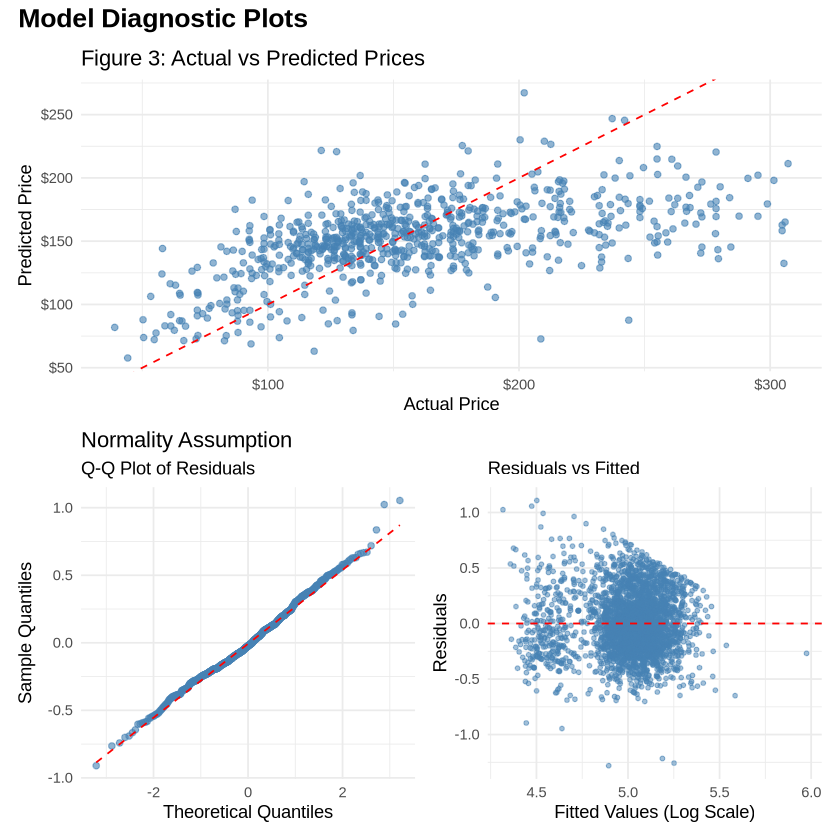

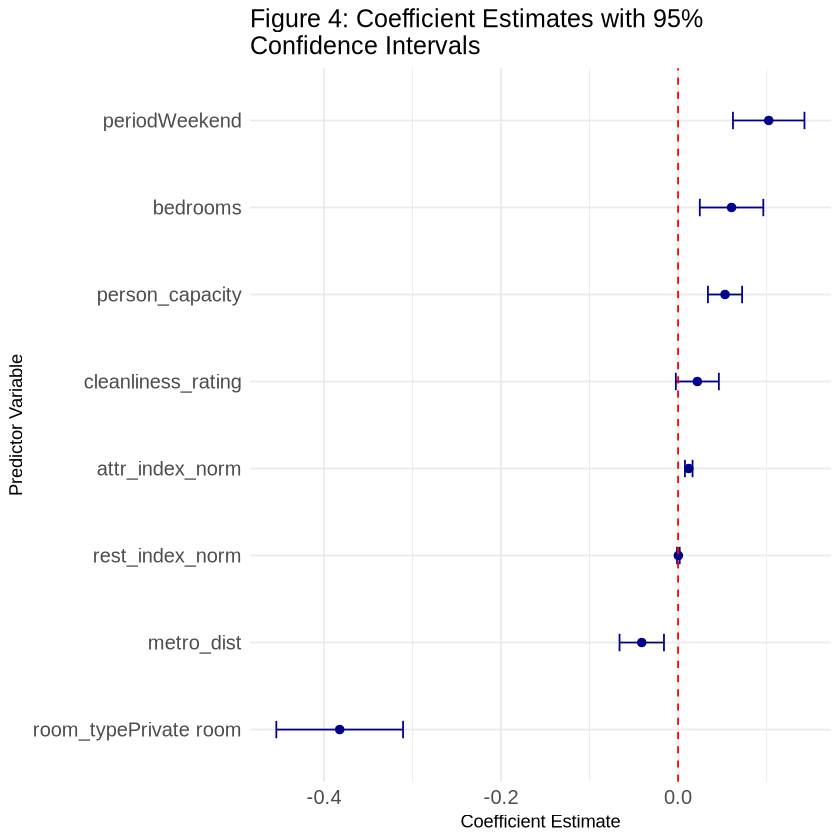

In [7]:
# Final model fit on test set
final_formula <- formula(best_model)
final_model <- lm(final_formula, data = test_data)

# Model diagnostics
vif_values <- vif(final_model)

# Results visualization

# Plot: Actual vs Predicted
predictions <- predict(final_model, newdata = test_data)
results_df <- data.frame(Actual = test_data$realSum, Predicted = exp(predictions))

p4 <- ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  scale_x_continuous(labels = dollar_format()) +
  scale_y_continuous(labels = dollar_format()) +
  labs(title = "Figure 3: Actual vs Predicted Prices",
       x = "Actual Price", y = "Predicted Price") +
  theme_minimal()

# Plot: QQ-plot
p5 <- ggplot(data = data.frame(resid = residuals(final_model)), aes(sample = resid)) +
  stat_qq(color = "steelblue", alpha = 0.6) +
  stat_qq_line(color = "red", linetype = "dashed") +
  labs(title = "Normality Assumption",
       subtitle = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal()

# Plot: Residuals vs. Fitted
diag_df <- data.frame(
  Fitted = fitted(best_model), 
  Residuals = residuals(best_model)
)

p6 <- ggplot(diag_df, aes(x = Fitted, y = Residuals)) +
  geom_point(color = "steelblue", alpha = 0.5, size = 1) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(subtitle = "Residuals vs Fitted",
       x = "Fitted Values (Log Scale)", y = "Residuals") +
  theme_minimal()

# Combine actual vs predicted, fitted vs. residual, and QQ plot into one
combined_plot <- p4 / (p5 + p6) +
  plot_annotation(
    title = "Model Diagnostic Plots",
    theme = theme(plot.title = element_text(size = 16, face = "bold"))
  )

# Figure 3: Coefficient plot
coef_data <- tidy(final_model) %>%
  filter(term != "(Intercept)") %>%
  mutate(term = fct_reorder(term, estimate))

p5 <- ggplot(coef_data, aes(x = estimate, y = term)) +
  geom_point(size = 2, color = "darkblue") +
  geom_errorbarh(aes(xmin = estimate - 1.96 * std.error, 
                     xmax = estimate + 1.96 * std.error), 
                 height = 0.2, color = "darkblue") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Figure 4: Coefficient Estimates with 95% \nConfidence Intervals",
       x = "Coefficient Estimate", y = "Predictor Variable") +
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 15),
    axis.text = element_text(size = 12)
  )

print(combined_plot)
print(p5)

### 3.4.2 Interpretation of Results:
**Figure 3 -** Interpretation of Actual vs Predicted Prices:
* The model captures the general positive relationship between actual and predicted prices, but predictions are noticeably compressed toward the center. The regression line lies above most points at high actual prices, indicating systematic underestimation for expensive listings above 400 dollar. Simultaneously, the model slightly overestimates some cheaper listings below $200, suggesting non-linearity or missing predictors that affect different price segments differently.

**Figure 4 -** Interpretation of Coefficient Estimates:
* Room characteristics show strong significant effects: bedrooms and person capacity have substantial positive associations with price, while private and shared rooms are priced significantly lower than entire homes (reference category). Quality metrics like cleanliness rating and guest satisfaction show positive but more modest effects. Geographic coordinates (lat, lng) display wide confidence intervals crossing zero, indicating unstable or non-significant effects, likely due to multicollinearity with other location variables.

**Model and Inference Results:**

The selection algorithm started with a full model and iteratively removed variables that contributed the least to the model's quality.
* **The Dropped Variables:**
    * **`host_is_superhost`:** Removed first. This suggests that, statistically, whether a host is a "superhost" or not does not hold significant explanatory power for price when other factors (like cleanliness or room type) are already controlled for.
    * **`guest_satisfaction_overall`:** Removed second. This is interesting, as one might expect satisfaction to drive price. However, it is likely highly correlated with `cleanliness_rating` (multicollinearity), and the model preferred `cleanliness_rating` as the stronger predictor.


We perform **t-tests** on individual coefficients ($H_0: \beta_j = 0$ vs $H_a: \beta_j \neq 0$) to determine if a specific predictor has a statistically significant relationship with the price.

* **Statistically Significant Variables:**
    * **Strong Significance ($p < 0.001$):** `room_type`, `person_capacity`, `bedrooms`, `attr_index_norm` (Attraction Index), and `period` (Weekend vs. Weekday). We have extremely strong evidence that these factors influence price.
    * **Moderate Significance:** `cleanliness_rating` ($p \approx 0.002$) and `rest_index_norm` ($p \approx 0.014$).
* **Non-Significant Variables:**
    * **`metro_dist`:** The p-value is 0.119, which is not significant at the 10% level. This may be because of Budapest's extensive metro system, which means most Airbnb's are close to a metro station.

Since the dependent variable is **log-transformed** ($\log(\text{realSum})$), we interpret the coefficients as **percentage changes** in the price.

* **Room Type (Reference: Entire Home/apt):**
    * **Private room ($-0.36$):** Holding all else constant, a Private Room is approximately **30.4% cheaper** than an Entire Home/apt.
    * **Shared room ($-0.29$):** A Shared Room is approximately **25% cheaper** than an Entire Home/apt, holding all other covariates constant.
    * This result is as expected, since entire homes/apt should be more expensive than just a room.
* **Capacity & Size:**
    * **`person_capacity` ($+0.059$):** For every additional person the unit accommodates, the price increases by roughly **6%**, holding all other covariates constant.
    * **`bedrooms` ($+0.056$):** For every additional bedroom, the price increases by roughly **5.8%**, holding all other covariates constant.
* **Time:**
    * **`periodWeekend` ($+0.061$):** Prices on Weekends are approximately **6.3% higher** than on Weekdays.
* **Location & Quality:**
    * **`attr_index_norm` and `rest_index_norm`:** attraction and restuarant index are very slightly positively associated with the price (about 0.1%)
    * **`cleanliness_rating` ($+0.018$):** An increase in the cleanliness rating leads to a price increase of roughly **1.8%** per unit of rating, holding all other covariates constant.
    *  **`metro_dist`:**Although not significant, metro_dist is negatively associated with the price. An increase in the distance to a metro station, is expected with a price decrease of about 1%, holding all other covariates constant. 

The overall F-Statistic is 167.5 with $p < 2.2e-16$. Since the p-value is very small, we reject the null at the 1% or higher level. The model as a whole is statistically significant compared to the null model.

### Section 3: Discussion
##### Summary of Findings
Together, the results demonstrate that while the model identifies several key pricing factors, surprisingly, it explains only moderate price variation (R² = 0.334 for best model). Although variables such as room type, capacity, cleanliness rating, and neighborhood-related indices significantly influence price, the model consistently underpredicts expensive listings and slightly overpredicts cheaper ones. This pattern shows that while linear regression captures broad pricing trends, it struggles to represent the full complexity of the Airbnb market.

##### Model Limitations
The model’s systematic biases reflect several structural limitations. Even after log-transforming price, the variability among high-priced properties remains difficult to capture with a linear model. This suggests that price determinants may be highly nonlinear or influenced by unmeasured qualitative features such as host experience, or listing popularity. Additionally, the modest effect sizes of neighborhood indices indicate that broader location categories may not fully reflect micro-level differences in desirability.

The residual plots reveal mild heteroskedasticity and non-normality, suggesting that more flexible modeling approaches—such as generalized linear models with Gamma errors or regularized models that incorporate interactions—may better represent the underlying structure of the data.

##### Implications for Future Research
The moderate explanatory power (R² = 0.334 in best model) indicates that substantial price variation stems from factors beyond basic listing characteristics. For Airbnb hosts, this suggests that while optimizing measurable features like room type and capacity is important, other unincluded factors such as aesthetic appeal, host reputation, and unique property features may be equally crucial for premium pricing. For researchers, the results highlight the need for more sophisticated location metrics and the importance of capturing property-specific qualitative features.

Building on these findings, future work could: develop more refined location metrics, potentially using kernel density estimates of nearby amenities; incorporate textual analysis of listing descriptions to capture qualitative and premium factors; explore machine learning approaches that can better detect non-linear relationships; and conduct comparative analyses across cities to determine whether these pricing patterns are Budapest-specific or generalizable across markets.

##### Conclusion:
The analysis identifies key drivers of Airbnb pricing in Budapest and delineates the limitations of linear models for this application. While room characteristics and basic quality metrics provide a solid foundation for understanding pricing patterns, capturing the full spectrum—particularly for luxury premiums—requires more sophisticated modeling approaches and richer feature variety that accounts for the qualitative and location-specific factors that distinguish luxury properties from ordinary ones.

### Section 4: References

Gyódi, K., & Nawaro, Ł. (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach (Supplementary Material) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4446043

Kaggle Dataset: "Airbnb Prices in European Cities" by thedevastator. Retrieved from: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

Methodology Reference: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.

Wang, D., & Nicolau, J. L. (2017). Price determinants of sharing economy based accommodation rental: A study of listings from 33 cities on Airbnb. International Journal of Hospitality Management, 62, 120-131.